# <span style='color:#ffffff'><span style='background :#000000'>Numax hacks</span></span>




#### For first-time users, we'll assume you do not know what $\rm \nu_{max}$ is for a given star \[and that's totally ok\]
In these scenarios, we have a convenient built-in method that uses the available information and/or data on a target to estimate a value for numax ($\rm \nu_{max}$). This is really helpful (and ***strongly encouraged***) for our non-expert users. The primary reason for this is that the main module (i.e. the global fit) derives all parameters *but* models the stellar background and solar-like oscillations separately in two steps. 

Basically we use the estimated $\rm \nu_{max}$ to mask out the region in the power spectrum believed to be exhibiting the solar-like oscillations so that it will not influence the stellar background estimates. The reverse is also true, hence why we do this in two steps. Consequently, we correct for the background contribution in the power spectrum before measuring our global properties $\rm \nu_{max}$ and $\Delta\nu$.

---

## Estimating $\rm \nu_{max}$ summary

There are three main ways to brute force $\rm \nu_{max}$ while still running the `Target.estimate_parameters()` method:
 - [**Option 1:**](#option1) enter the desired trial number by using the `--ask` flag
 - [**Option 2:**](#option2) provide your own value for $\rm \nu_{max}$ by using the same flag
 - [**Option 3:**](#option3) use an upper frequency limit to cut out sharp (likely not astrophysical) features in the power spectrum

---

In [1]:
from pysyd import utils
from pysyd import plots
from pysyd import target

### Load in default settings for KIC 1435467

Since `pySYD` is optimized for command-line use as well as processing multiple stars, a lot of the options such as showing figures and printing verbose output are disabled. However for demonstration purposes, we'll change two of the defaults.

In [2]:
name = '1435467'
args = utils.Parameters(stars=[name])
#args.params[name]['show']=True
args.params[name]['verbose']=True
star = target.Target(name, args)
if star.ok:
    star.process_star()


-----------------------------------------------------------
Target: 1435467
-----------------------------------------------------------
# LIGHT CURVE: 37919 lines of data read
# Time series cadence: 59 seconds
# POWER SPECTRUM: 99518 lines of data read
# PS oversampled by a factor of 5
# PS resolution: 0.426868 muHz
-----------------------------------------------------------
PS binned to 269 datapoints

Numax estimates
---------------
Numax estimate 1: 7859.44 +/- 8.35
S/N: 12.53
Numax estimate 2: 7867.33 +/- 24.06
S/N: 7.50
Numax estimate 3: 1498.74 +/- 88.04
S/N: 9.19
Selecting model 1
-----------------------------------------------------------
GLOBAL FIT
-----------------------------------------------------------
PS binned to 223 data points

Background model
----------------
Comparing 6 different models:
Model 0: 0 Harvey-like component(s) + white noise fixed
 BIC = 1160.91 | AIC = 5.21
Model 1: 0 Harvey-like component(s) + white noise term
 BIC = 1085.73 | AIC = 4.85
Model 2: 1 H

By default, it selects the trial that has the highest signal-to-noise (S/N) detection -- which here was the first estimate with S/N ~12. However, the value for numax is really high ($\rm \nu_{max} \sim 7860 \mu Hz$) and is likely latching on to an artefact or something else that is not astrophysical. 

To be sure though, let's take a look at the plots and results to see what's going on.

### Plot estimates

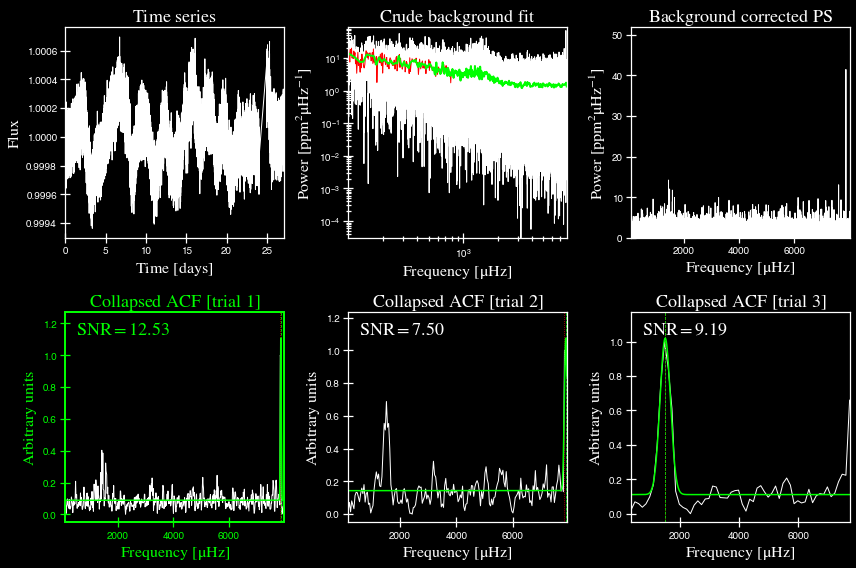

In [3]:
star.params['show'] = True
plots.set_plot_params()
plots.plot_estimates(star)

As suspected, it selected and highlighted the first "trial" due to some high frequency artefact. It was still behaving how it was expected to, but that's not the type of feature we are looking for. In the upper righthand corner, we can see power excess in the ~1000-2000 muHz frequency region. 

We have a few options of how we can go about this. The first is to provide an upper frequency limit that will restrict the power spectrum to below that large spike. Although, if you take a look at the lower righthand corner, the third trial does end up estimating a good value for numax. Therefore we can brute force this trial with the `--ask` option, which is `False` by default.

---

## Option 1: enter the trial number <a id='option1'></a>

We will re-load the star and this time change the `--ask` command to `True`. This option will literally *ask* you which trial you prefer. This will also display the plot regardless of your preset options, that way you can make the most informed decision for which to select. As a result, we do *not* recommend using this for many stars.


-----------------------------------------------------------
Target: 1435467
-----------------------------------------------------------
# LIGHT CURVE: 37919 lines of data read
# Time series cadence: 59 seconds
# POWER SPECTRUM: 99518 lines of data read
# PS oversampled by a factor of 5
# PS resolution: 0.426868 muHz
-----------------------------------------------------------
PS binned to 269 datapoints

Numax estimates
---------------
Numax estimate 1: 7859.44 +/- 8.35
S/N: 12.53
Numax estimate 2: 7867.33 +/- 24.06
S/N: 7.50
Numax estimate 3: 1498.74 +/- 88.04
S/N: 9.19


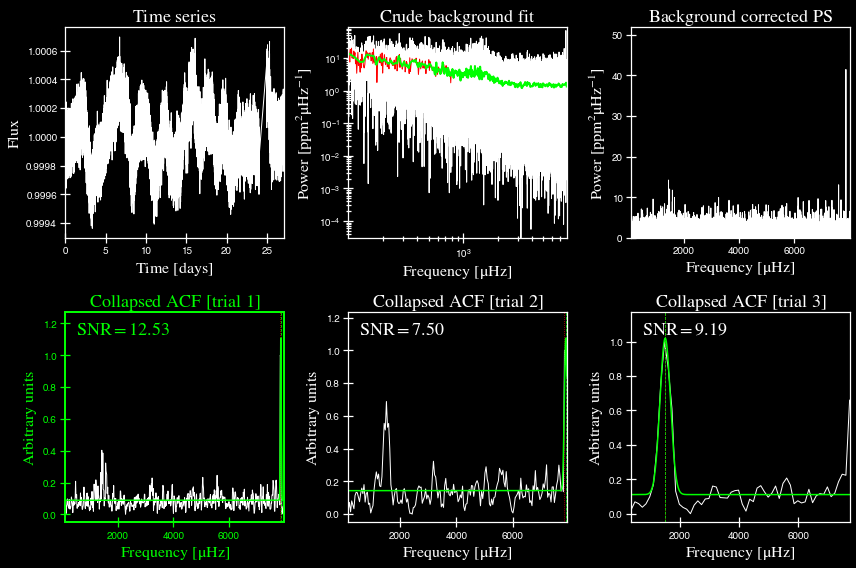


Which estimate would you like to use? 3
Selecting model 3


In [4]:
star = target.Target('1435467', args)
star.params['ask'] = True
star.estimate_parameters()

Now we can feel more confident about the value that we provide to the main method. 

Before we go to our other main alternative (masking the higher frequencies), there's one other thing I'd like to point out. Let's assume that all three of these trials had bogus values but we are pretty confident that the numax was around ~1450. Turns out that we an use the *same flag* but instead, provide our own value.

---

## Option 2: provide your own estimate <a id='option2'></a>


-----------------------------------------------------------
Target: 1435467
-----------------------------------------------------------
# LIGHT CURVE: 37919 lines of data read
# Time series cadence: 59 seconds
# POWER SPECTRUM: 99518 lines of data read
# PS oversampled by a factor of 5
# PS resolution: 0.426868 muHz
-----------------------------------------------------------
PS binned to 269 datapoints

Numax estimates
---------------
Numax estimate 1: 7859.44 +/- 8.35
S/N: 12.53
Numax estimate 2: 7867.33 +/- 24.06
S/N: 7.50
Numax estimate 3: 1498.74 +/- 88.04
S/N: 9.19


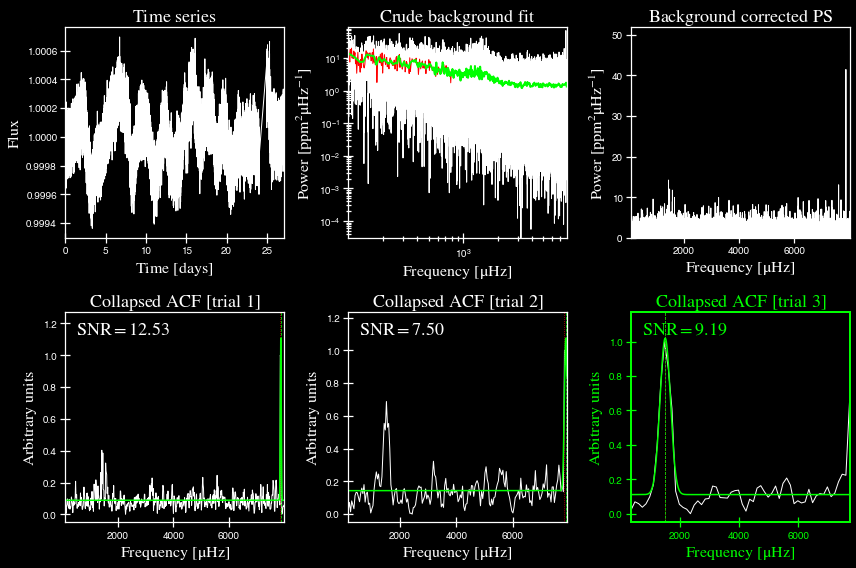


Which estimate would you like to use? 5
ERROR: please select an integer between 1 and 3 
       (or 0 to provide your own value for numax)

Which estimate would you like to use? 0

What is your value for numax? 1400
Using numax of 1400.00 muHz as an initial guess


In [5]:
star = target.Target('1435467', args)
star.params['ask'] = True
star.estimate_parameters()

So we intentionally provided an integer value for a trial that does not exist so you could see the alternate option(s) for input data. By entering `0`, we are able to provide a float number that we will set numax to.

The plot will still show the three trials but you might've noticed that it didn't highlight any trials since we are using our own value.

Finally, we can catch this problem earlier on by providing an upper frequency limit for the power spectrum that is used in this routine.

---

## Option 3: Provide upper limit <a id='option3'></a>

So we re-load the target star in, but set the upper frequency limit (`--upper_ex`) to $\rm 6000 \mu Hz$. 

**Note:** you'll notice there are a lot of lower/upper bounds but their naming will start to make sense as you use the software more. For example, this first routine that estimates numax used to be called `find_excess()` (since that's technically what it does!) and hence, the "ex" for the flag. The same is true for the **B**ack**G**round-fitting routine (`--lower_bg`/`--upper_bg`)

In [6]:
star = target.Target('1435467', args)
star.params['ask'] = False
star.params['upper_ex'] = 6000.0
star.estimate_parameters()


-----------------------------------------------------------
Target: 1435467
-----------------------------------------------------------
# LIGHT CURVE: 37919 lines of data read
# Time series cadence: 59 seconds
# POWER SPECTRUM: 99518 lines of data read
# PS oversampled by a factor of 5
# PS resolution: 0.426868 muHz
-----------------------------------------------------------
PS binned to 244 datapoints

Numax estimates
---------------
Numax estimate 1: 1471.27 +/- 68.37
S/N: 2.18
Numax estimate 2: 1521.60 +/- 47.10
S/N: 4.54
Numax estimate 3: 1480.96 +/- 90.93
S/N: 10.07
Selecting model 3


Remember that the figure was only displaying because we enacted the `--ask` option, so let's double check the figure to be sure.

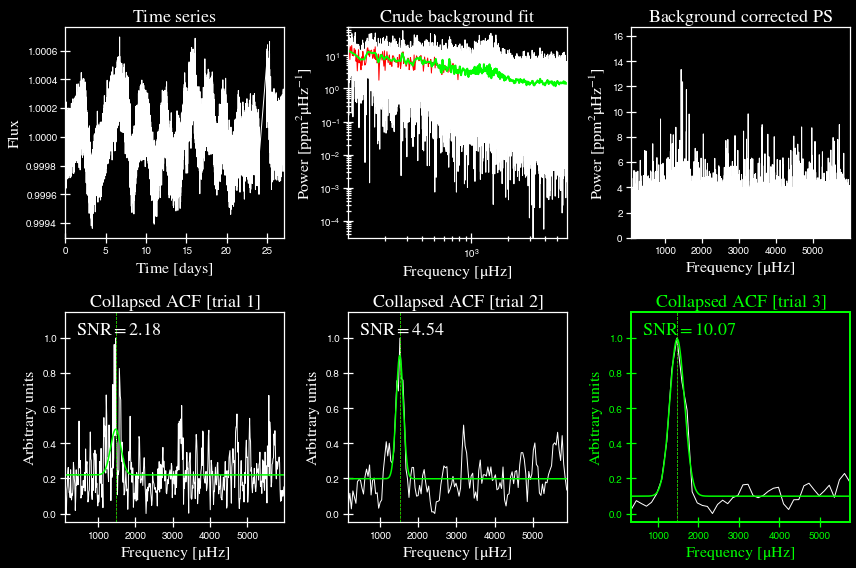

In [7]:
plots.plot_estimates(star)

If you look in the upper righthand corner of the figure, you'll notice that the power spectrum only goes up to $6000 \mu \mathrm{Hz}$ this time. That enabled three nice, equally-usable trial runs *but* you can see that the values for $\rm \nu_{max}$ are all consistent with one another to within $\rm \pm 1\sigma$. Therefore any of these guesses would suffice!

---